In [1]:
import pandas as pd
import numpy as np

fact_checks_df = pd.read_csv('fact_checks.csv')
posts_df = pd.read_csv('posts.csv')
mapping_df = pd.read_csv('fact_check_post_mapping.csv')

# Example preview of the data
print(fact_checks_df.head())
print(posts_df.head())
print(mapping_df.head())

   fact_check_id                                              claim  \
0              0  (' Are avocados good for you?', ' Are avocados...   
1              1  (' Can animals have headaches?', ' Can animals...   
2              2  (" Can we help prevent Alzheimer's with diet?"...   
3              3  (' Do any benefits of alcohol outweigh the ris...   
4              4  (' Does acupuncture work for headaches?', ' Do...   

                                           instances title  
0  [(1525653998.0, 'https://metafact.io/factcheck...   NaN  
1  [(1617955634.0, 'https://metafact.io/factcheck...   NaN  
2  [(1525653998.0, 'https://metafact.io/factcheck...   NaN  
3  [(1525653998.0, 'https://metafact.io/factcheck...   NaN  
4  [(1617955595.0, 'https://metafact.io/factcheck...   NaN  
   post_id                                     instances  \
0        0                        [(1608571882.0, 'fb')]   
1        1                        [(1586139153.0, 'fb')]   
2        2  [(1610052141.0,

In [2]:
# Check for missing values by column
print("Missing values by column:")
print(fact_checks_df.isnull().sum())
print(posts_df.isnull().sum())
print(mapping_df.isnull().sum())

# Check for missing values by row
print("\nMissing values by row (fact_checks_df):")
fact_checks_df['missing_count'] = fact_checks_df.isnull().sum(axis=1)
print(fact_checks_df[['missing_count']].value_counts())

print("\nMissing values by row (posts_df):")
posts_df['missing_count'] = posts_df.isnull().sum(axis=1)
print(posts_df[['missing_count']].value_counts())

print("\nMissing values by row (mapping_df):")
mapping_df['missing_count'] = mapping_df.isnull().sum(axis=1)
print(mapping_df[['missing_count']].value_counts())

# Fill rows with missing values in 'title' for fact_checks_df
fact_checks_df['title'].fillna(np.nan, inplace=True)

# Drop rows with missing values in 'text' for posts_df
posts_df.dropna(subset=['text'], inplace=True)


Missing values by column:
fact_check_id        0
claim                0
instances            0
title            14976
dtype: int64
post_id         0
instances       0
ocr             0
verdicts        0
text         2731
dtype: int64
fact_check_id    0
post_id          0
dtype: int64

Missing values by row (fact_checks_df):
missing_count
0                190775
1                 14976
Name: count, dtype: int64

Missing values by row (posts_df):
missing_count
0                25361
1                 2731
Name: count, dtype: int64

Missing values by row (mapping_df):
missing_count
0                31305
Name: count, dtype: int64


In [3]:
# Check for missing values by column
print("Missing values by column:")
print(fact_checks_df.isnull().sum())
print(posts_df.isnull().sum())
print(mapping_df.isnull().sum())

Missing values by column:
fact_check_id        0
claim                0
instances            0
title            14976
missing_count        0
dtype: int64
post_id          0
instances        0
ocr              0
verdicts         0
text             0
missing_count    0
dtype: int64
fact_check_id    0
post_id          0
missing_count    0
dtype: int64


In [5]:
# Extract English translation from claim
fact_checks_df['claim_text'] = fact_checks_df['claim'].apply(lambda x: x[1] if isinstance(x, tuple) else x)

# Extract English translation from title, and use claim if title is NaN
fact_checks_df['title_text'] = fact_checks_df.apply(
    lambda row: row['title'][1] if isinstance(row['title'], tuple) and row['title'][1] is not None
                else row['claim_text'], axis=1
)

# Extract English translation from posts
posts_df['post_text'] = posts_df['text'].apply(lambda x: x[1] if isinstance(x, tuple) else x)

# Preview the results
print(fact_checks_df[['claim_text', 'title_text']].head())
print(posts_df[['post_text']].head())


                                          claim_text  \
0  (' Are avocados good for you?', ' Are avocados...   
1  (' Can animals have headaches?', ' Can animals...   
2  (" Can we help prevent Alzheimer's with diet?"...   
3  (' Do any benefits of alcohol outweigh the ris...   
4  (' Does acupuncture work for headaches?', ' Do...   

                                          title_text  
0  (' Are avocados good for you?', ' Are avocados...  
1  (' Can animals have headaches?', ' Can animals...  
2  (" Can we help prevent Alzheimer's with diet?"...  
3  (' Do any benefits of alcohol outweigh the ris...  
4  (' Does acupuncture work for headaches?', ' Do...  
                                              post_text
2731  ('\n"Don Quijote soy, y mi profesión la de and...
2732  ('\n#agnipath\n\n', '\n#agnipath\n\n', [('hi-L...
2733  ('\nCircula nas redes sociais um vídeo do ex-p...
2734  ('\nGRACIAS por DIFUNDIR 🙏🙏🙏Canal de TELEGRAM:...
2735  ('\nHay gente buena en todas partes del mundo..

In [6]:
# Extract English translations from OCR and concatenate with the post text (if available)
posts_df['ocr_text'] = posts_df['ocr'].apply(lambda x: " ".join([ocr[1] for ocr in eval(x)]) if pd.notnull(x) else "")
posts_df['post_text'] = posts_df.apply(lambda row: row['post_text'] + " " + row['ocr_text'], axis=1)

# Handle verdicts (optional)
posts_df['verdicts'] = posts_df['verdicts'].apply(lambda x: eval(x) if pd.notnull(x) else [])


In [7]:
import re

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to both the post and claim texts
fact_checks_df['claim_text'] = fact_checks_df['claim_text'].apply(clean_text)
fact_checks_df['title_text'] = fact_checks_df['title_text'].apply(clean_text)
posts_df['post_text'] = posts_df['post_text'].apply(clean_text)

# Preview cleaned text
print(fact_checks_df[['claim_text', 'title_text']].head())
print(posts_df[['post_text']].head())


                                          claim_text  \
0  Are avocados good for you Are avocados good fo...   
1  Can animals have headaches Can animals have he...   
2  Can we help prevent Alzheimers with diet Can w...   
3  Do any benefits of alcohol outweigh the risks ...   
4  Does acupuncture work for headaches Does acupu...   

                                          title_text  
0  Are avocados good for you Are avocados good fo...  
1  Can animals have headaches Can animals have he...  
2  Can we help prevent Alzheimers with diet Can w...  
3  Do any benefits of alcohol outweigh the risks ...  
4  Does acupuncture work for headaches Does acupu...  
                                              post_text
2731  nDon Quijote soy y mi profesin la de andante c...
2732  nagnipathnn nagnipathnn hiLatn 10 unemployment...
2733  nCircula nas redes sociais um vdeo do expresid...
2734  nGRACIAS por DIFUNDIR Canal de TELEGRAM Guille...
2735  nHay gente buena en todas partes del mundoWlad.

In [8]:
from transformers import XLMRobertaTokenizer

# Load XLM-R tokenizer
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

# Tokenize and pad the sequences for both claims and posts
fact_checks_df['claim_tokens'] = fact_checks_df['claim_text'].apply(lambda x: tokenizer(x, truncation=True, padding='max_length', max_length=128, return_tensors='pt')['input_ids'])
posts_df['post_tokens'] = posts_df['post_text'].apply(lambda x: tokenizer(x, truncation=True, padding='max_length', max_length=128, return_tensors='pt')['input_ids'])

# Example of tokenized outputs
print(fact_checks_df['claim_tokens'].head())
print(posts_df['post_tokens'].head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


0    [[tensor(0), tensor(15901), tensor(218060), te...
1    [[tensor(0), tensor(4171), tensor(85825), tens...
2    [[tensor(0), tensor(4171), tensor(642), tensor...
3    [[tensor(0), tensor(984), tensor(2499), tensor...
4    [[tensor(0), tensor(101790), tensor(11668), te...
Name: claim_tokens, dtype: object
2731    [[tensor(0), tensor(653), tensor(60728), tenso...
2732    [[tensor(0), tensor(24), tensor(13866), tensor...
2733    [[tensor(0), tensor(653), tensor(441), tensor(...
2734    [[tensor(0), tensor(653), tensor(81439), tenso...
2735    [[tensor(0), tensor(653), tensor(100254), tens...
Name: post_tokens, dtype: object


In [14]:
# Calculate the numbers
num_fact_checks = fact_checks_df.shape[0]
num_posts = posts_df.shape[0]
num_mappings = mapping_df.shape[0]
#num_languages = mappings['pair_lang'].nunique()  # Number of unique language pairs

print(f"Number of Fact-Checks: {num_fact_checks}")
print(f"Number of Social Media Posts: {num_posts}")
print(f"Number of Mappings: {num_mappings}")

Number of Fact-Checks: 205751
Number of Social Media Posts: 25361
Number of Mappings: 31305


In [9]:
# Merge DataFrames without including 'pair_lang'
fact_checks_with_mapping = pd.merge(mapping_df, fact_checks_df, on='fact_check_id', how='left')
full_df = pd.merge(fact_checks_with_mapping, posts_df, on='post_id', how='left')


In [10]:
# Example: Count of fact-checks and posts
fact_check_count = full_df['fact_check_id'].nunique()
post_count = full_df['post_id'].nunique()
print(f"Number of fact-checks: {fact_check_count}")
print(f"Number of posts: {post_count}")


Number of fact-checks: 18107
Number of posts: 28092


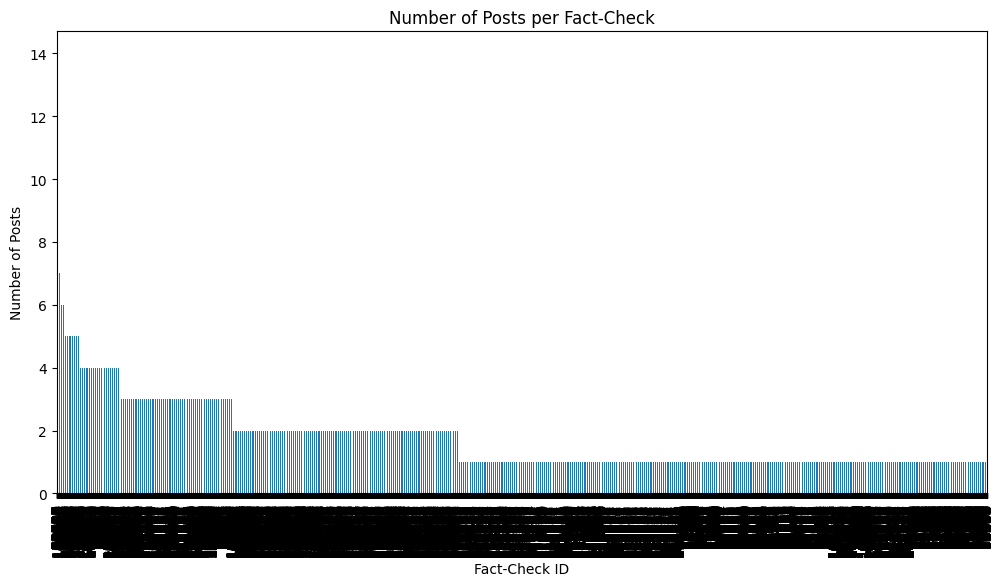

In [22]:
import matplotlib.pyplot as plt

# Example: Bar chart for number of fact-checks and posts
full_df['fact_check_id'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Number of Posts per Fact-Check')
plt.xlabel('Fact-Check ID')
plt.ylabel('Number of Posts')
plt.show()


In [16]:
# Example: Merge and analyze relationships
merged_df = full_df[['fact_check_id', 'post_id']]
print(merged_df.head())
merged_df.to_csv('merged_data.csv', index=False)

   fact_check_id  post_id
0             33     2228
1             33     2229
2             33     6088
3            156     3858
4            156    17393


In [17]:
# Number of posts per fact-check
posts_per_fact_check = full_df['fact_check_id'].value_counts()
print(posts_per_fact_check)

fact_check_id
36164     14
50462     11
80290     10
33802      9
137030     9
          ..
88664      1
33386      1
88768      1
88769      1
88276      1
Name: count, Length: 18107, dtype: int64


In [18]:
# Example: Check unique verdicts
exploded_verdicts = posts_df['verdicts'].explode()
unique_verdicts = posts_df['verdicts'].explode().unique()
print(unique_verdicts)

# Example: Preview texts
print(full_df[['claim', 'title', 'text']].head())
# Count occurrences of each unique verdict
verdict_counts = exploded_verdicts.value_counts()
print("\nVerdict Counts:")
print(verdict_counts)

[nan 'Partly false information' 'False information' 'False information.'
 'Partly false information.' 'False' 'Missing context' 'Missing context.'
 'Altered photo/video.' 'False information and graphic content'
 'Partly False' 'Altered video' 'Altered photo' 'Altered Photo/Video'
 'Missing Context' ' Sensitive content ' 'False headline'
 'Support your favourite streamers by sending them stars.'
 'Altered photo/video']
                                               claim  \
0  ('"$4 trillion jobs plan" unnecessary because ...   
1  ('"$4 trillion jobs plan" unnecessary because ...   
2  ('"$4 trillion jobs plan" unnecessary because ...   
3  ('"26 groupes armés" ont rendu les armes dans ...   
4  ('"26 groupes armés" ont rendu les armes dans ...   

                                               title  \
0  ('Posts on Biden jobs plan falsely claim 2020 ...   
1  ('Posts on Biden jobs plan falsely claim 2020 ...   
2  ('Posts on Biden jobs plan falsely claim 2020 ...   
3  ('Non, les aut

In [19]:
# Example: Check the first few instances
print(fact_checks_df['instances'].head())
print(posts_df['instances'].head())


0    [(1525653998.0, 'https://metafact.io/factcheck...
1    [(1617955634.0, 'https://metafact.io/factcheck...
2    [(1525653998.0, 'https://metafact.io/factcheck...
3    [(1525653998.0, 'https://metafact.io/factcheck...
4    [(1617955595.0, 'https://metafact.io/factcheck...
Name: instances, dtype: object
2731            [(None, 'ig')]
2732            [(None, 'ig')]
2733    [(1652319130.0, 'ig')]
2734    [(1638592829.0, 'ig')]
2735            [(None, 'ig')]
Name: instances, dtype: object


In [21]:
import pandas as pd
import ast

# Load the CSV files into DataFrames
fact_checks_df = pd.read_csv('fact_checks.csv')
posts_df = pd.read_csv('posts.csv')
mapping_df = pd.read_csv('fact_check_post_mapping.csv')

# Function to extract language code from the provided format in claims, titles, and OCR/text fields
def extract_language(text):
    try:
        # Convert string representation of list to actual list/tuple
        lang_info = ast.literal_eval(text)
        if isinstance(lang_info, list) and lang_info:
            return lang_info[0][2]  # Extract the language code
    except (ValueError, IndexError, SyntaxError, TypeError):
        return None
    return None

def language(text):
    try:
        # Convert string representation of list to actual list/tuple
        lang_info = ast.literal_eval(text)
        if isinstance(lang_info, list) and lang_info:
            return lang_info[0][0]  # Extract the language code
    except (ValueError, IndexError, SyntaxError, TypeError):
        return None
    return None

# Extract language from claims in fact checks
fact_checks_df['claim_lang'] = fact_checks_df['claim'].apply(language)

# Extract language from OCR in posts
posts_df['ocr_lang'] = posts_df['ocr'].apply(extract_language)

# Merge fact checks and posts language information with the mapping DataFrame
merged_df = mapping_df.merge(fact_checks_df[['fact_check_id', 'claim_lang']], on='fact_check_id', how='left')
merged_df = merged_df.merge(posts_df[['post_id', 'ocr_lang']], on='post_id', how='left')

# Combine the languages into a pair for the pair_lang column
merged_df['pair_lang'] = merged_df.apply(lambda row: (row['claim_lang'], row['ocr_lang']), axis=1)

# Save the updated DataFrame to a new CSV file
merged_df.to_csv('updated_fact_check_post_mapping.csv', index=False)

print("Updated CSV with pair_lang column saved as 'updated_fact_check_post_mapping.csv'.")


Updated CSV with pair_lang column saved as 'updated_fact_check_post_mapping.csv'.
